In [1]:
from pathlib import Path
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import article

In [2]:
BR_DATA_DIR = Path('../../data/BirdsongRecognition/')
BR_TEST_DIRS = sorted(list(BR_DATA_DIR.glob('Bird*/')))

CONFIGS_DIR = Path('../../src/configs/')
BR_CONFIGS = sorted(list(CONFIGS_DIR.glob('*BirdsongRecognition*ini')))
BR_CONFIGS = [config for config in BR_CONFIGS if 'bird07' not in str(config)]

In [4]:
BR_DATA_DIR_HDLCU3 = Path('/media/bart/HD-LCU3/tweetynet_paper/BirdsongRecognition_copy_combined/')
BR_TEST_DIRS_HDLCU3 = sorted(list(BR_DATA_DIR_HDLCU3.glob('Bird*/learning_curve*/test/')))

In [3]:
br_df = article.util.make_df(BR_CONFIGS, BR_TEST_DIRS)

In [ ]:
# make sure we are recovering accuracy array from dataframe
frame_err_arrs_from_data = {}
for bird_num, tweetynet_src, hdlcu3_src in zip(range(2, 10), BR_TEST_DIRS, BR_TEST_DIRS_HDLCU3):
    bird_ID = f'Bird{bird_num}'
    assert bird_ID in str(tweetynet_src)
    with open(tweetynet_src.joinpath('test_err'), 'rb') as f:
        test_err_tweetynet = pickle.load(f)
    with open(hdlcu3_src.joinpath('test_err'), 'rb') as f:
        test_err_hdlcu3 = pickle.load(f)
    assert np.array_equal(test_err_tweetynet, test_err_hdlcu3)
    frame_err_arrs_from_data[bird_ID] = test_err_hdlcu3
    
frame_err_arrs_from_df = {}
for animal_ID in frame_err_arrs_from_data.keys():
    df_this_animal = br_df[br_df.animal_ID == animal_ID]
    train_set_durs_this_animal = df_this_animal.train_set_dur.unique()
    frame_err_test = []
    for tsd_this in train_set_durs_this_animal:
        frame_err_test.append(df_this_animal[df_this_animal.train_set_dur == tsd_this].frame_error_test.to_numpy())
    frame_err_arrs_from_df[animal_ID] = frame_err_test

for k, v in frame_err_arrs_from_df.items():
    assert np.array_equal(v, frame_err_arrs_from_data[k])

In [4]:
train_set_durs = [60, 120, 480]
br_df_agg = article.util.agg_df(br_df, train_set_durs)

In [5]:
sns.set(style="darkgrid")

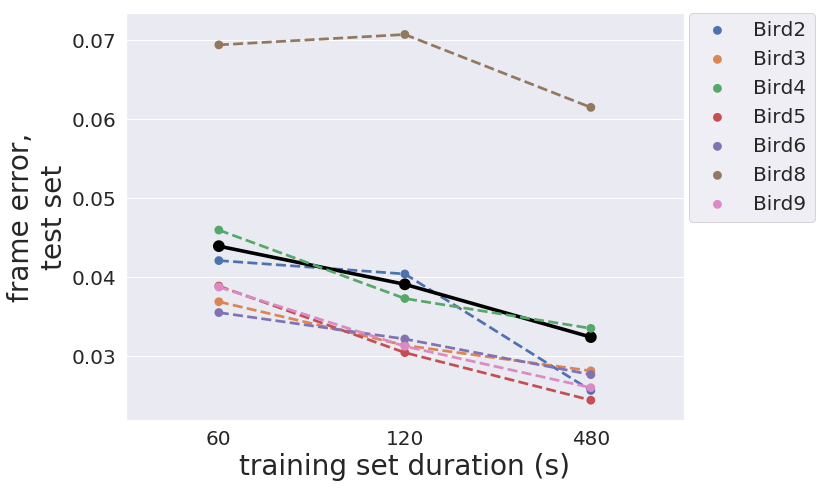

In [9]:
ax = article.plot.frame_error_rate_test_mean(br_df_agg)
plt.savefig('br_frame_error.png', bbox_inches = "tight")

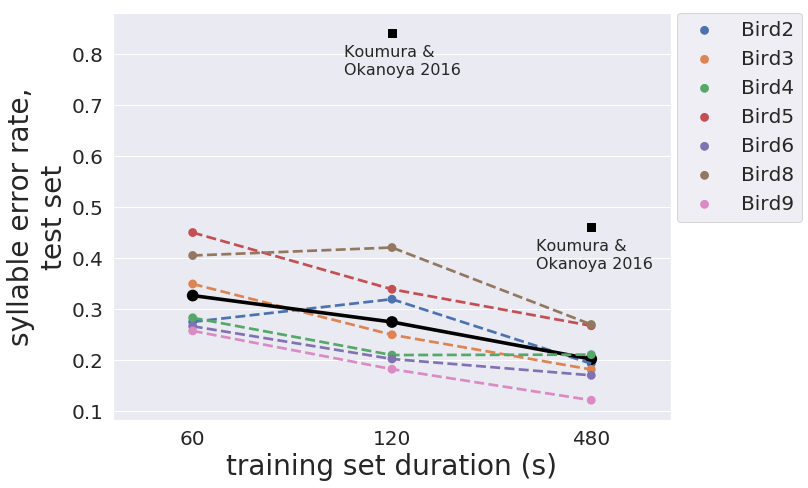

In [10]:
ax = article.plot.syllable_error_rate_test_mean(br_df_agg)
ax.set_xlim([-0.4, 2.4])
ax.scatter(1, 0.84, s=75, color='black', marker='s')
ax.text(0.76, 0.76, 'Koumura &\nOkanoya 2016', fontsize=16)
ax.scatter(2, 0.46, s=75, color='black', marker='s')
ax.text(1.725, 0.38, 'Koumura &\nOkanoya 2016', fontsize=16)
plt.savefig('br_syl_error.png', bbox_inches = "tight")